In [1]:
# Customizing Ticks
import matplotlib.pyplot as plt 
plt.style.use("classic")
import numpy as np 

%matplotlib inline 

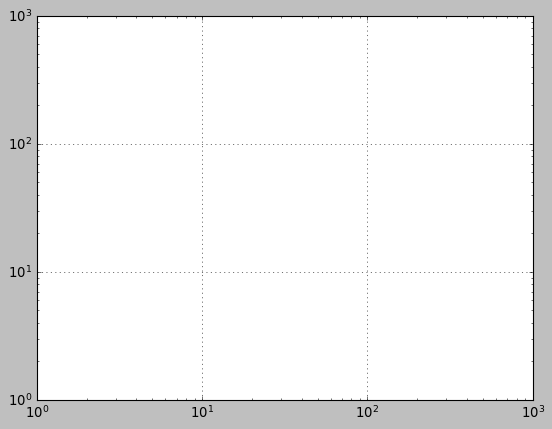

In [2]:
# major and minor ticks 

ax = plt.axes(xscale="log", yscale="log")
ax.set(xlim=(1,1E3), ylim=(1,1E3))
ax.grid(True)

In [4]:
# установка тикеров производится через локаторы и форматтеры
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

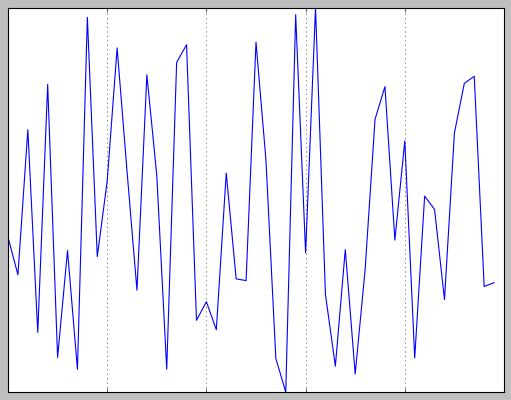

In [5]:
# Hiding Ticks and Labels 

ax = plt.axes()
rng = np.random.default_rng(1701)
ax.plot(rng.random(50))
ax.grid()

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

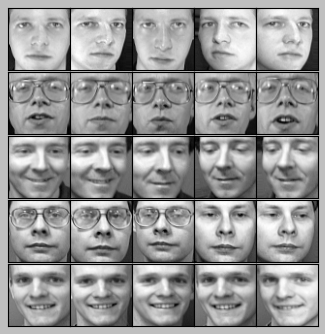

In [11]:
fig, ax = plt.subplots(5,5, figsize=(5,5))
fig.subplots_adjust(hspace=0, wspace=0)

# get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images 

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap='binary_r')        

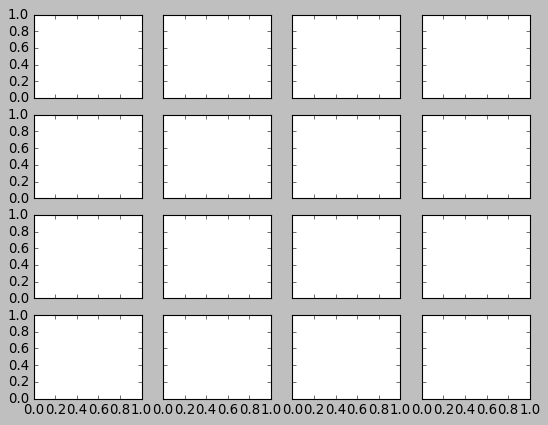

In [12]:
# Reducing or Increasing the Number of Ticks
fig, ax = plt.subplots(4,4, sharex=True, sharey=True)

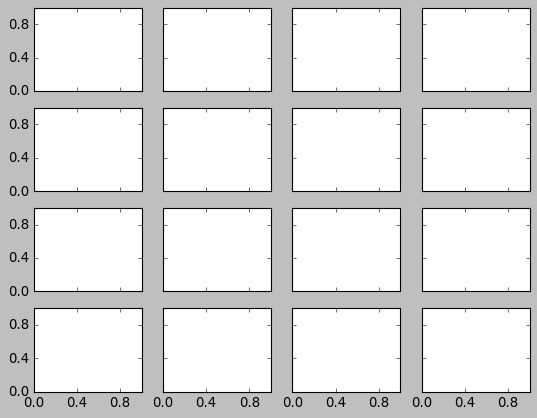

In [13]:
# for every axis, set the x and y major locator 
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))

fig 

(0.0, 9.42477796076938)

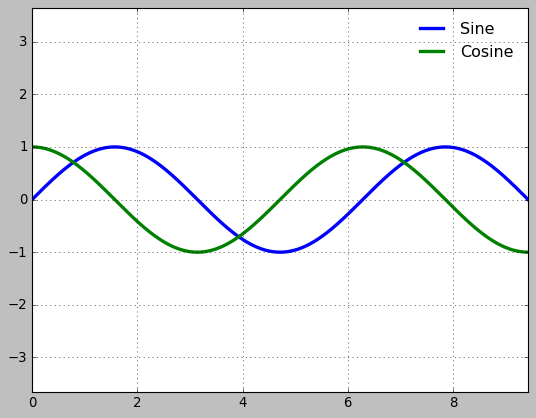

In [14]:
# Fancy Tick Formats 

# plot a sine and cosine curve 
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label="Sine")
ax.plot(x, np.cos(x), lw=3, label="Cosine")

# set up the grid, legend, and limits 
ax.grid(True)
ax.legend(frameon=False)
ax.axis("equal")
ax.set_xlim(0,3*np.pi)

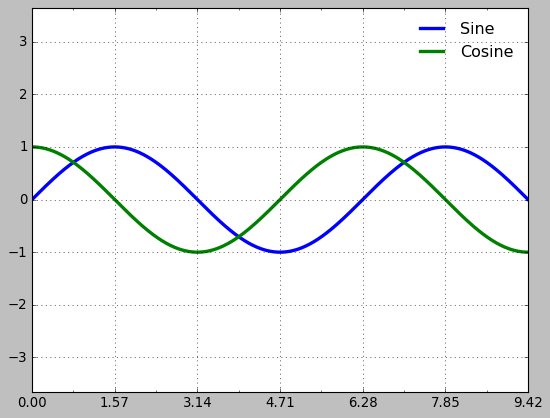

In [15]:
# приводим тики в соответствии с графиком 
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig 

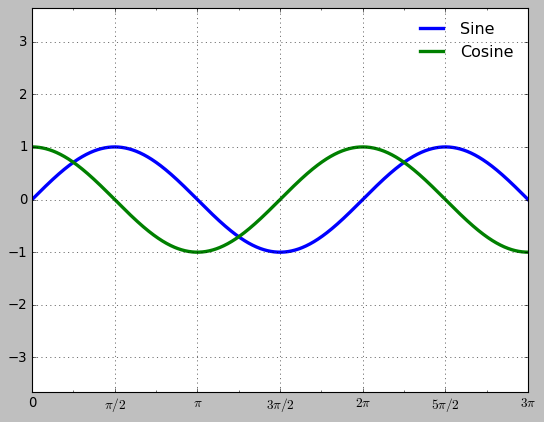

In [16]:
# используем для форматирования заданную функцию 
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2*value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return rf"${N}\pi/2$"
    else:
        return rf"${N // 2}\pi$"
    
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig